# Punto 1

Considere la serie de tiempo asociada con los futuros de la criptomoneda Bitcoin desde que comenzó a tradearse hasta la fecha del día de hoy. Utilice la API de finnhub para obtener esta serie de tiempo. Recuerde que para esto debe crear primero una cuenta, y así obtener su API Key para realizar la conexión de forma efectiva.

In [2]:
import finnhub
import pandas as pd
from time import mktime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set_context("paper")

In [4]:
# api_key de finnhub (https://finnhub.io/dashboard)
finnhub_client = finnhub.Client(api_key="ckuirj9r01qmtr8l8f40ckuirj9r01qmtr8l8f4g")

In [5]:
#crypto = 'BTC' # acciones de Bitcoin
crypto = 'BINANCE:BTCUSDT'
resolution = 'D' # serie diaria

start_date = 1590988249
end_date = datetime.now() #fecha de hoy
#start_date = end_date - timedelta(days=365) # desde hoy con historia de 365

In [7]:
#start = start_date
#start = int(start_date.timestamp())# transforma fecha inicial unix-time a entero
end = int(end_date.timestamp()) # transforma fecha final unix-time a entero

BTC_res = finnhub_client.crypto_candles(crypto, resolution, 1590988249, end) #respuesta 
BTC_df = pd.DataFrame(BTC_res) # transformar respuesta  pandas

BTC_df.head()

,c,h,l,o,s,t,v
0,9518.04,10228.99,9266.00,10202.71,ok,1591056000,108970.773151
1,9666.24,9690.00,9365.21,9518.02,ok,1591142400,46252.644939
2,9789.06,9881.63,9450.00,9666.32,ok,1591228800,57456.100969
3,9621.16,9854.75,9581.00,9788.14,ok,1591315200,47788.050050
4,9666.30,9735.00,9531.05,9621.17,ok,1591401600,32752.950893


In [9]:
# funcion que transforma fecha int a fecha humana
def date_format(date_col):
    return datetime.fromtimestamp(date_col).strftime("%Y-%m-%d")

In [10]:
BTC_df['t'] = BTC_df['t'].apply(date_format) # transforma la columna t a fecha humana con la funcion 'date_format' creada
BTC_df.head()

,c,h,l,o,s,t,v
0,9518.04,10228.99,9266.00,10202.71,ok,2020-06-01,108970.773151
1,9666.24,9690.00,9365.21,9518.02,ok,2020-06-02,46252.644939
2,9789.06,9881.63,9450.00,9666.32,ok,2020-06-03,57456.100969
3,9621.16,9854.75,9581.00,9788.14,ok,2020-06-04,47788.050050
4,9666.30,9735.00,9531.05,9621.17,ok,2020-06-05,32752.950893


In [11]:
# Renombrar las columnas
BTC_df.rename(columns = {'c':'Close','h':'High','l':'Low','o':'Open','t':'Date','v':'Volume'}, inplace = True)
# Eliminar la columna 's'
BTC_df.drop('s', axis=1, inplace = True)
BTC_df.head()

,Close,High,Low,Open,Date,Volume
0,9518.04,10228.99,9266.00,10202.71,2020-06-01,108970.773151
1,9666.24,9690.00,9365.21,9518.02,2020-06-02,46252.644939
2,9789.06,9881.63,9450.00,9666.32,2020-06-03,57456.100969
3,9621.16,9854.75,9581.00,9788.14,2020-06-04,47788.050050
4,9666.30,9735.00,9531.05,9621.17,2020-06-05,32752.950893


## Grafica

En la primera grafica podremos identificar el compoartamiento de los datos del la criptomoneda Bitcon en la muestra seleccionada.

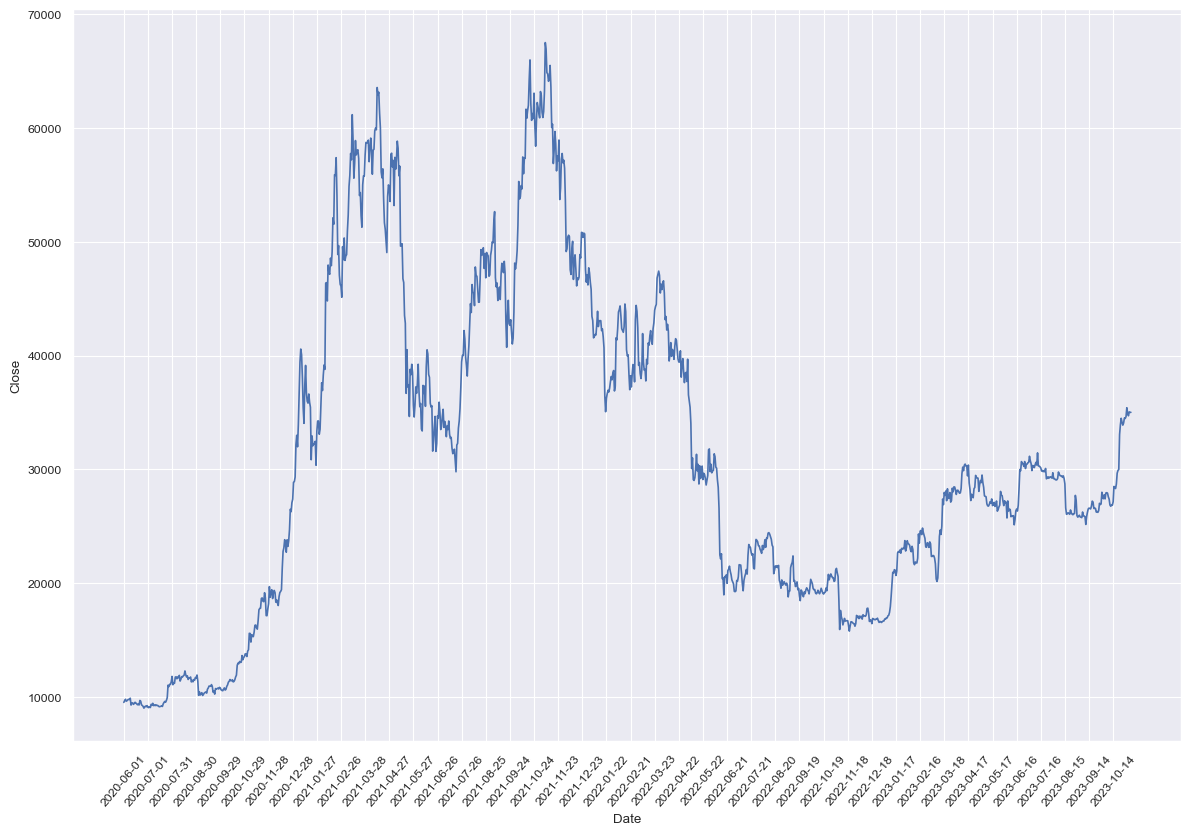

In [12]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=BTC_df, x="Date", y="Close")
freq = int(30)
xtix = ax.get_xticks() 
ax.set_xticks(xtix[::freq]) # evita que las etiquetas se sobrepongan
plt.tight_layout()
plt.xticks(rotation=50);

## Grafico de velas

La siguiente grafica representa el precio de la criptomoneda Bitcoin.

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = BTC_df.Date,
                                     open = BTC_df.Open, 
                                     high = BTC_df.High,
                                     low = BTC_df.Low, 
                                     close = BTC_df.Close)
                     ])
fig.update_layout(
    title="Bitcoin. (BTC)",
    xaxis_title="Day",
    yaxis_title="BTC-USD",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## Prueba Dickey-Fuller

Realizaremos una prueba estadistica para verificar si la serie es estacionaria o no.

In [14]:
# prueba de estacionariedad
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [15]:
result = adfuller(BTC_df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.874916
p-value: 0.343952


La criptomoneda Bitcoin no es estacionaria, el p-valor de la prueba mayor 0.05 no se rechaza la $H_{0}$ que sugiere estacionariedad con la prueba de dicky-fuller.

P-value > 0,05. Dado que el valor de Adfuller es mayor que un determinado valor alfa especificado (5%, nivel de significación o intervalo de confianza del 95%), se acepta la hipótesis nula ($H_{0}$), es decir, la serie temporal no es estacionaria.

## Gráficos de autocorrelación

 Realizaremos tres figuras, correspondientes a la autocorrelación de la serie original, la serie diferenciada una vez, y dos veces.

In [16]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

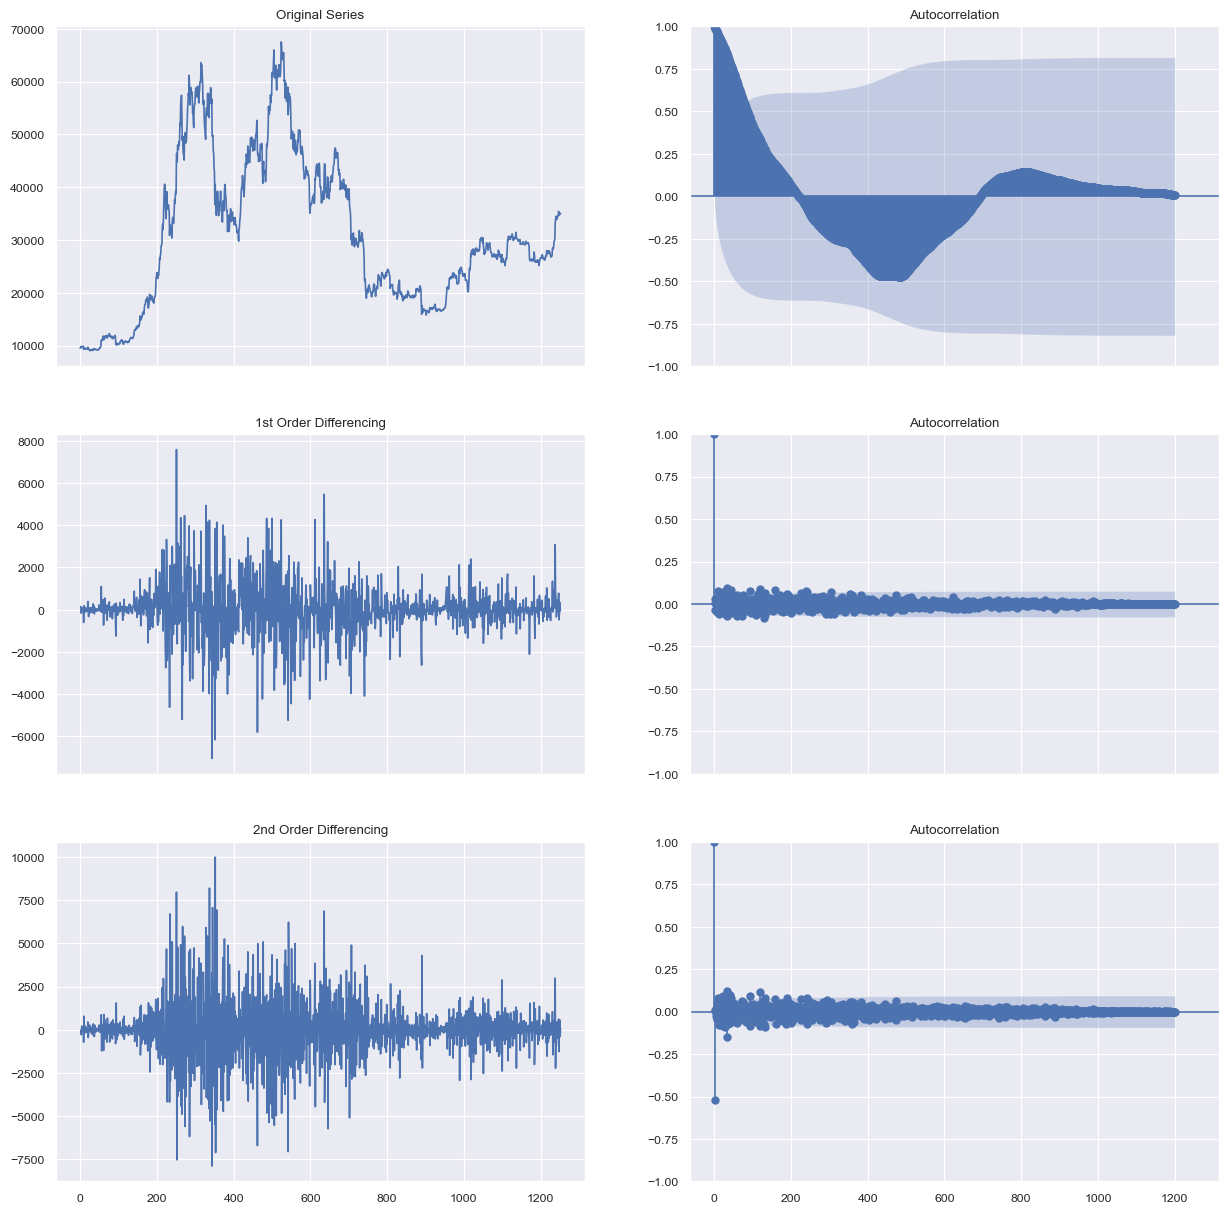

In [17]:
plt.rcParams.update({'figure.figsize': (15,15)}) #dimension de figuras 15x15

fig, axes = plt.subplots(3, 2, sharex=True) # matriz de 3x2 'sharex=True' todos comparten mismo eje x
# Gráfica [1,1]: serie original de los precios de cierre
axes[0, 0].plot(BTC_df.Close); axes[0, 0].set_title('Original Series')
# Gráfica [1,2]:(ACF) función de autocorrelación de la serie original
plot_acf(BTC_df.Close, ax=axes[0, 1], lags = 1200); #lags(retrazo de max 240)

# Gráfica [2,1]: diferenciación de primer orden de los precios de cierre
axes[1, 0].plot(BTC_df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
# Gráfica [2,2]:(ACF) autocorrelación de diferenciación de primer orden de los precios de cierre, eliminando valores null de la diferenciación
plot_acf(BTC_df.Close.diff().dropna(), ax=axes[1, 1], lags = 1200); #lags(retrazo de max 240)

# Gráfica [3,1]: diferenciación de segundo orden de los precios de cierre
axes[2, 0].plot(BTC_df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# Gráfica [3,2]: diferenciación de segundo orden de los precios de cierre
plot_acf(BTC_df.Close.diff().diff().dropna(), ax=axes[2, 1], lags = 1200); #lags(retrazo de max 240)

- En la primera figura de autocorrelacion se interpreta como una autocorrelación asociada a una serie de tiempo no estacionaria.

- En la segunda y tercera gráfica de autocorrelación, se definen los intervalos de confianza al 95% y se dibujan en la figura conica de color azul, en la cual se identifica como el retardo entra en la nona negativa con bastante rapidez.

# Punto 2

Repita TODOS los pasos indicados en esta sección para encontrar modelos ARIMA para predecir el precio de Bitcoin con los siguientes horizontes: 7 días, 14 días, 21 días, 28 días. Utilizar siempre predicciones usando rolling con ventana de predicción continua de un día. Cualquier cantidad de pasos extra para enriqucer su anális predictivo serán aceptados siempre y cuando sean acordes con lo que indica la teoría de análisis de series de tiempo.

## MODELO ARIMA

### Criterio AIC

A continuación se define el modelo ARIMA de la librería **statsmodels**, considerando el cálculo de verosimilitud asociada al criterio AIC de bondad de ajuste.

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [19]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

def find_best_arima_AIC(train, p_range=5, d_range=3):
    best_aic = np.inf
    best_order = None
    best_mdl = None

    pq_rng = range(p_range)  # rango de valores para 'p' y 'q'
    d_rng = range(d_range)   # rango de valores para 'd'

    for i in pq_rng:  # p de AR (autoregresión)
        for d in d_rng:  # i de integración
            for j in pq_rng:  # q de MA (media móvil)
                try:
                    # Ajusta el modelo con los valores (p,d,q)
                    tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                    # (AIC) Criterio de información de Akaike
                    tmp_aic = tmp_mdl.aic
                    # tmp_aic inicia en infinito y se compara con cada modelo generado por ARIMA
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic  # Toma el mejor AIC
                        best_order = (i, d, j)  # Toma los mejores parámetros
                        best_mdl = tmp_mdl  # Toma el mejor modelo
                except: 
                    continue

    return best_aic, best_order, best_mdl


Horizonte: 7 días
train: (1246,)
test_: (7,)
Mejor modelo ARIMA considerando el criterio de Akaike:
aic: 21241.03612 | order: (2, 1, 4)


<Figure size 1200x800 with 0 Axes>

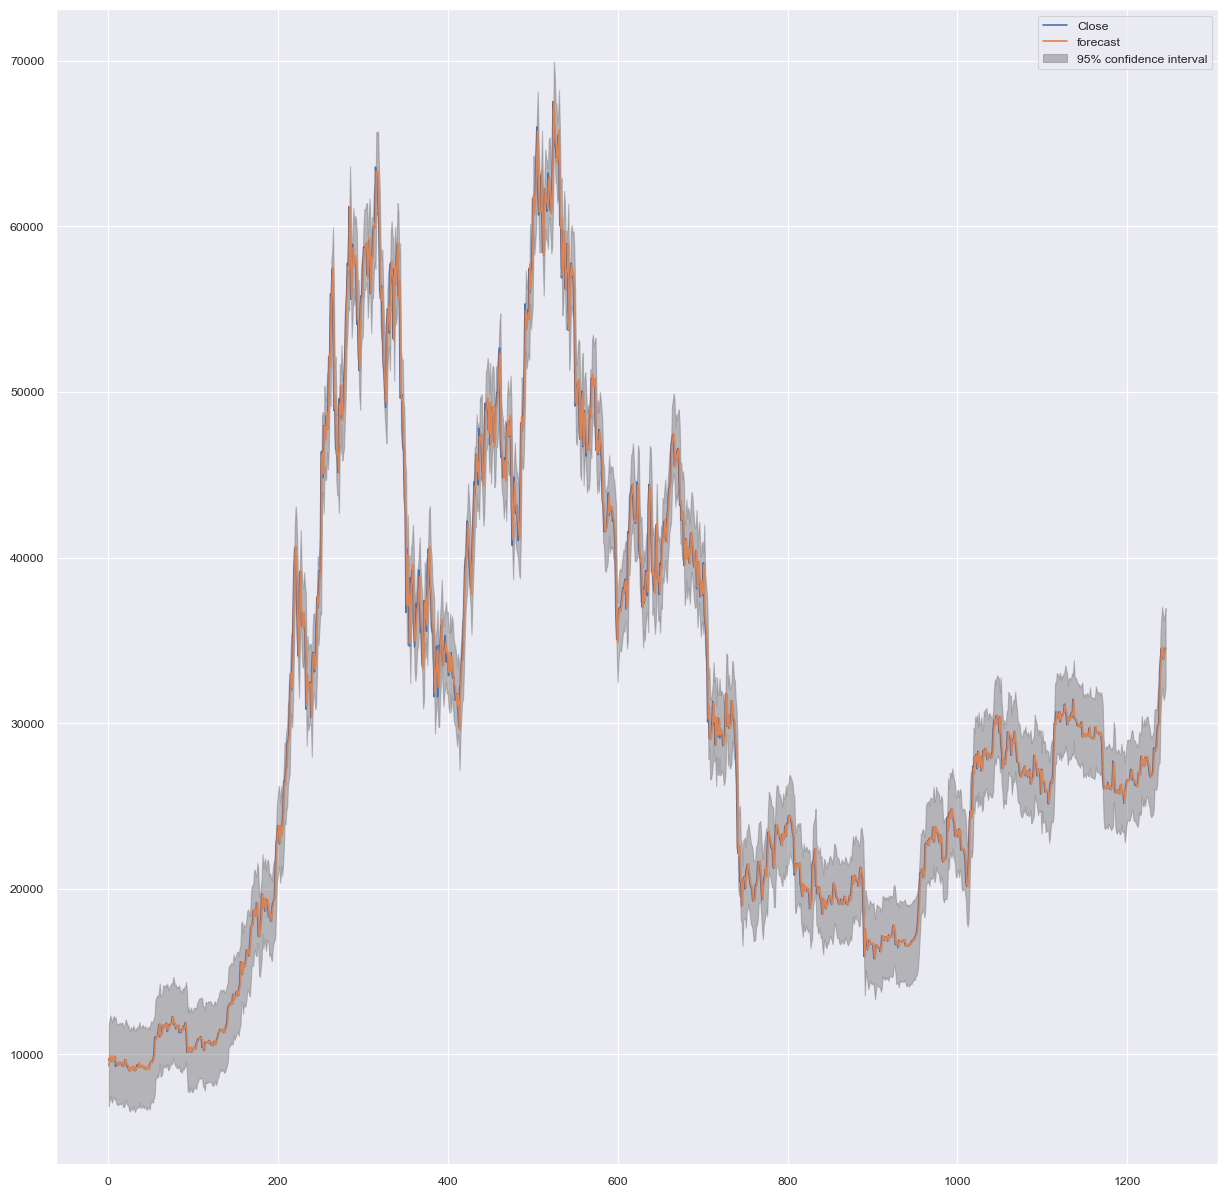

Horizonte: 14 días
train: (1239,)
test_: (14,)
Mejor modelo ARIMA considerando el criterio de Akaike:
aic: 21128.37210 | order: (2, 2, 3)


<Figure size 1200x800 with 0 Axes>

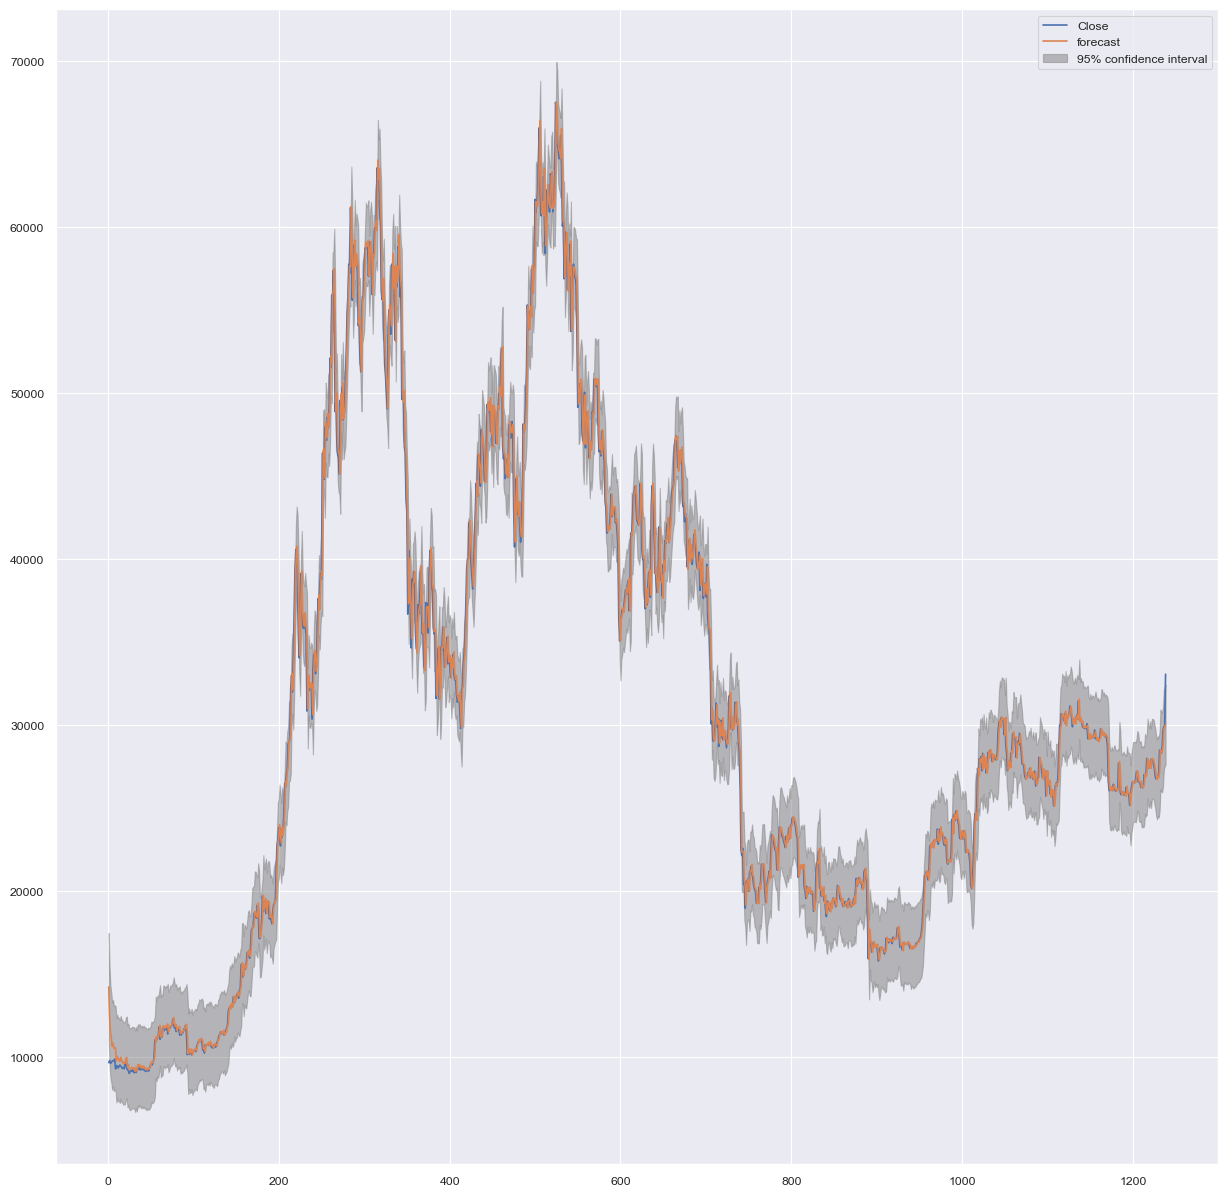

Horizonte: 21 días
train: (1232,)
test_: (21,)
Mejor modelo ARIMA considerando el criterio de Akaike:
aic: 21007.99260 | order: (2, 1, 4)


<Figure size 1200x800 with 0 Axes>

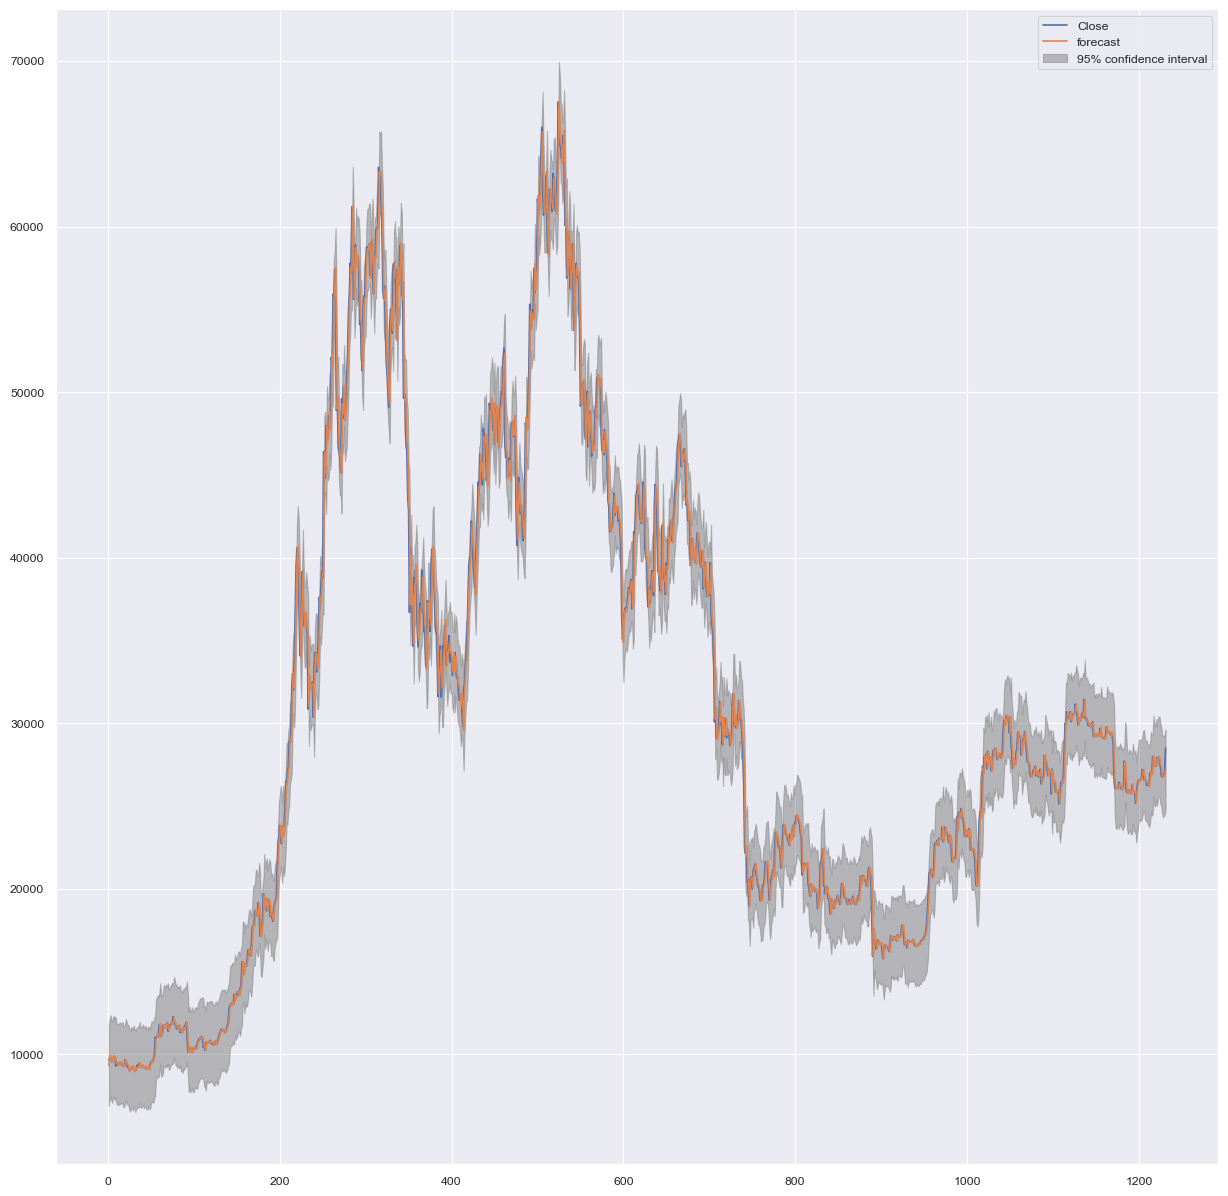

Horizonte: 28 días
train: (1225,)
test_: (28,)
Mejor modelo ARIMA considerando el criterio de Akaike:
aic: 20896.29203 | order: (2, 2, 3)


<Figure size 1200x800 with 0 Axes>

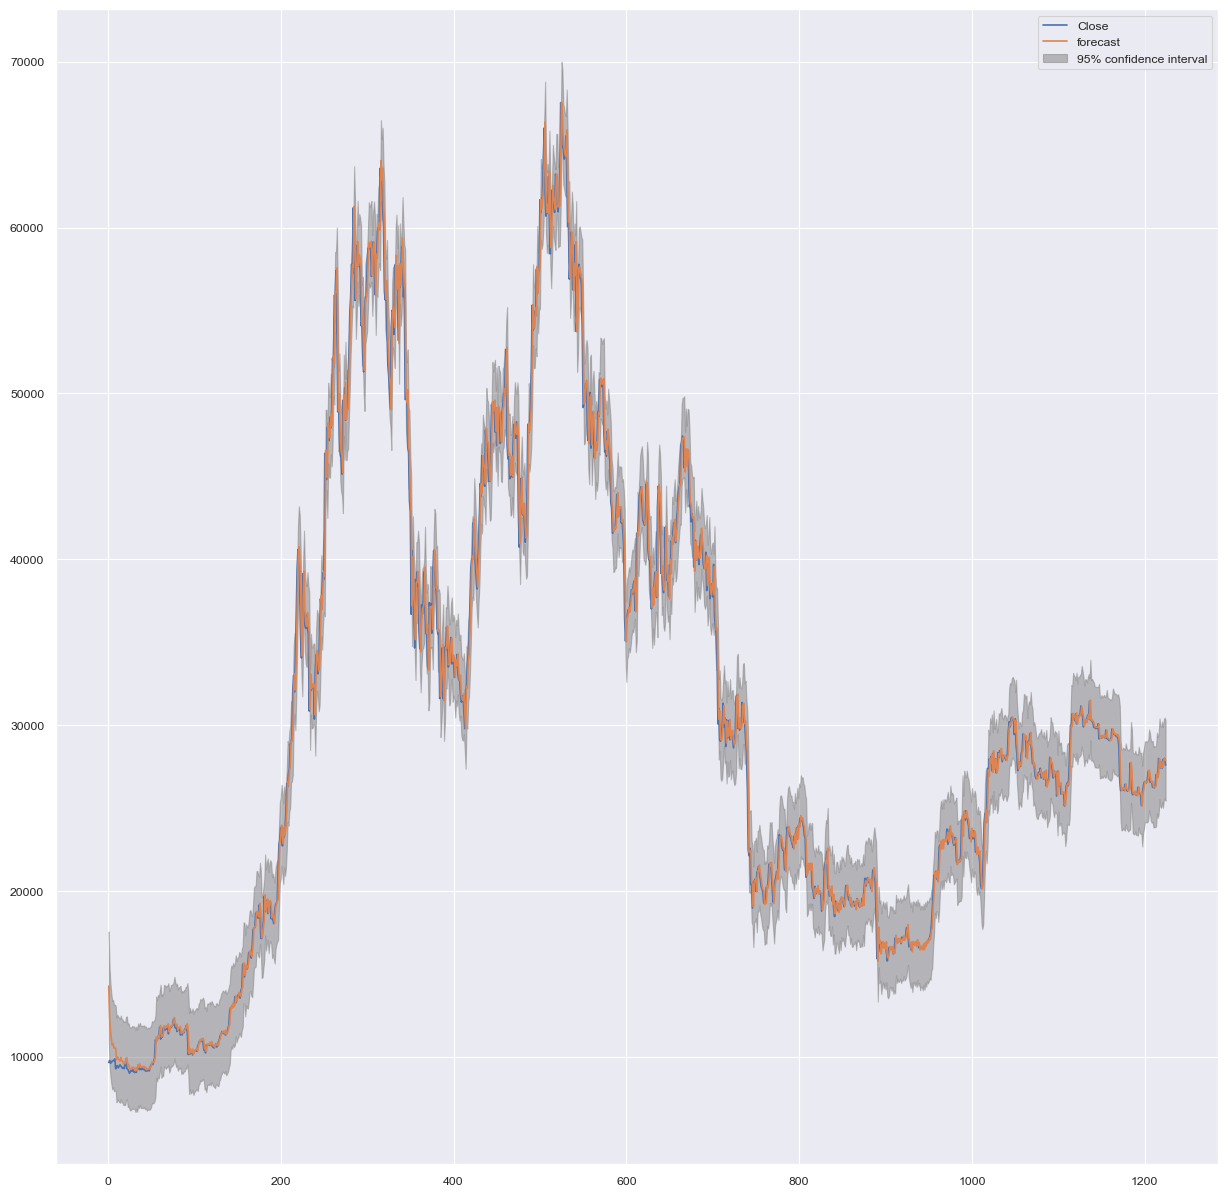

In [20]:
n_BTC = len(BTC_df) #Número total de cierres
n_test_req = [7,14,21,28] # Tamaño de conjunto de prueba

for n_test in n_test_req:
    train_size = n_BTC - n_test # define el set de entrenamiento como el numero total de cierres menos el test.
    train = BTC_df.Close.iloc[:train_size] # extrae los cierres del set de entrenamiento
    dates_train = BTC_df.Date.iloc[:train_size] # extrae las fechas del set de entrenamiento
    test_x = BTC_df.Close.iloc[train_size:train_size + n_test] # extrae los cierres del set de prueba (entrenamiento + prueba)
    dates_x = BTC_df.Date.iloc[train_size:train_size + n_test] # extrae las fechas del set de prueba (entrenamiento + prueba)
    
    print("Horizonte:",n_test,'días')
    print("train:", train.shape)
    print("test_:", test_x.shape)
    print("Mejor modelo ARIMA considerando el criterio de Akaike:")
    best_aic, best_order, best_mdl = find_best_arima_AIC(train)
    
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
    
    model = ARIMA(train, order=best_order)
    model_fit = model.fit()
    plt.figure(figsize = (12,8))
    fig, ax = plt.subplots()
    ax = train.loc[1:].plot(ax=ax)
    plot_predict(model_fit, 1, ax=ax)
    plt.show();
    
    
    

El resultado anterior obedece a la generacion de modelos ARIMA considerando el criterio de Akaike para cada horizonte (7, 14, 21,28) solicitado.

En este modelo el criterio de información Akaike (AIC) es de orde (p,d,q) presenta las siguientes características:

- 'p' autorregresivo (AR) significa que el modelo predice con los 'p' valores anteriores.

- 'd' grado de diferenciación (I) significa que utilizara una diferenciación de 'd' orden para hacer la serie estacionaria.

- 'q' numero de términos promedio móvil (MA) significa que el modelo utiliza 'q' errores de predicción pasado para modelar la serie temporal.

### Rolling forecasting

A continuacion se realizaran las prediciones utilizando rolling forecasting basado en el mejor modelo mejor modelo ARIMA bajo el Criterio AIC.

In [21]:
def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions

In [22]:
def forecast_accuracy(forecast, actual, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2]},
                          index=[str_name])
    
    return df_acc

Horizonte: 7 días
predicted=34516.173660, expected=34639.770000
predicted=34582.673716, expected=35421.430000
predicted=35491.562948, expected=34941.590000
predicted=34911.890945, expected=34716.780000
predicted=34765.702944, expected=35062.070000
predicted=35137.133742, expected=35011.880000
predicted=34989.444460, expected=35018.670000
   Horizonte         MAE            MSE      MAPE        RMSE        R2
0        7.0  308.326122  166243.249511  0.008835  407.729383 -1.981578
Horizonte: 14 días
predicted=33096.706685, expected=33922.730000
predicted=33869.043636, expected=34496.050000
predicted=34545.280110, expected=34151.660000
predicted=34147.245849, expected=33892.020000
predicted=33891.910694, expected=34081.000000
predicted=34142.136084, expected=34525.890000
predicted=34509.068254, expected=34474.730000
predicted=34516.173660, expected=34639.770000
predicted=34582.673716, expected=35421.430000
predicted=35491.562948, expected=34941.590000
predicted=34911.890945, expected=3471

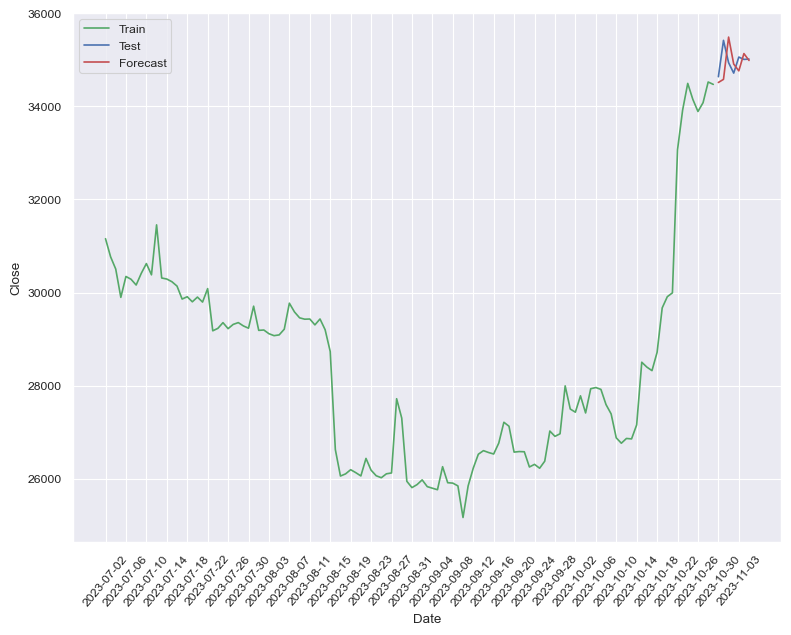

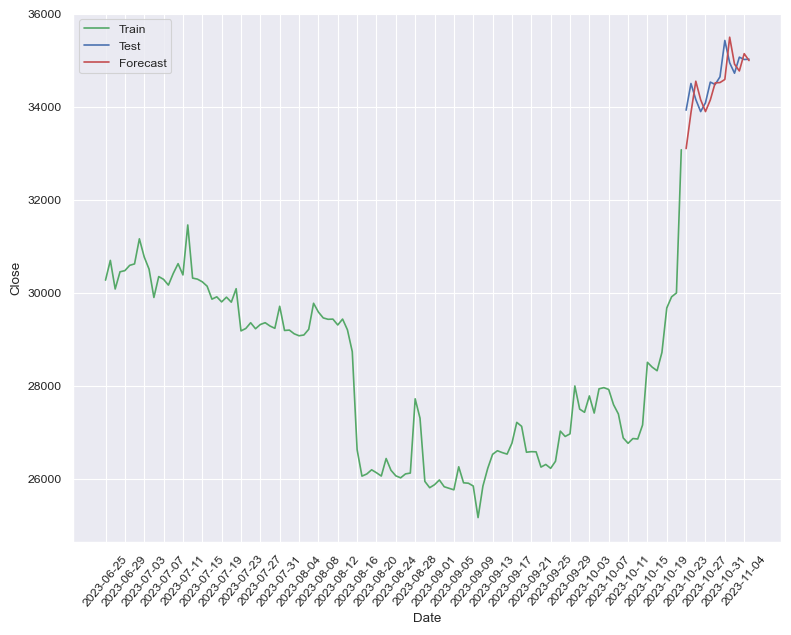

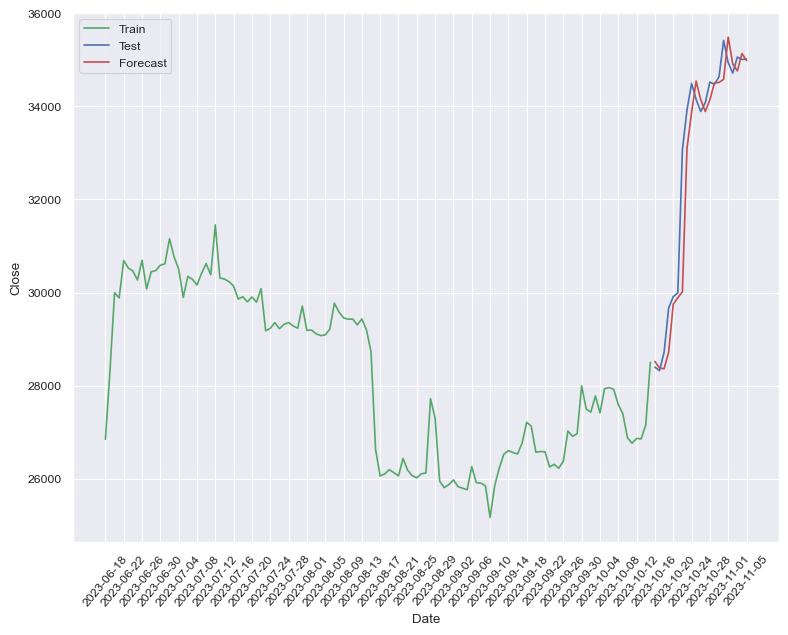

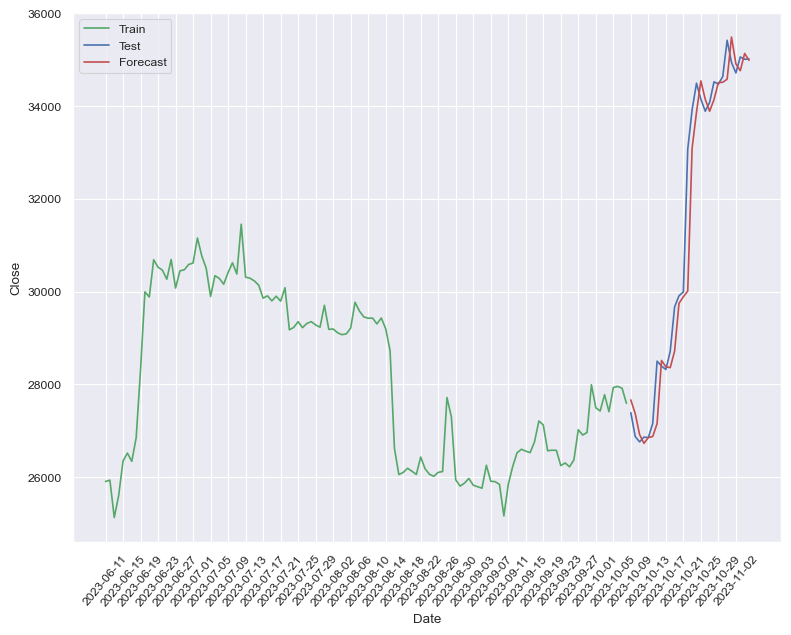

In [23]:
n_BTC = len(BTC_df) #Número total de cierres
n_test_req = [7,14,21,28] # Tamaño de conjunto de prueba

results_errors_AIC = pd.DataFrame(columns=['Horizonte', 'MAE', 'MSE', 'MAPE', 'RMSE', 'R2'])
count = 0

for n_test in n_test_req:
    train_size = n_BTC - n_test # define el set de entrenamiento como el numero total de cierres menos el test.
    train = BTC_df.Close.iloc[:train_size] # extrae los cierres del set de entrenamiento
    dates_train = BTC_df.Date.iloc[:train_size] # extrae las fechas del set de entrenamiento
    test_x = BTC_df.Close.iloc[train_size:train_size + n_test] # extrae los cierres del set de prueba (entrenamiento + prueba)
    dates_x = BTC_df.Date.iloc[train_size:train_size + n_test] # extrae las fechas del set de prueba (entrenamiento + prueba)
    
    print("Horizonte:",n_test,'días')
    
    yhat_x  = arima_rolling(train.tolist(), test_x.tolist())
    df_acc= forecast_accuracy(np.array(test_x), np.array(yhat_x), n_test)
    results_errors_AIC.loc[count] = [n_test, df_acc.iloc[0]['MAE'], df_acc.iloc[0]['MSE'], df_acc.iloc[0]['MAPE'], df_acc.iloc[0]['RMSE'], df_acc.iloc[0]['R2']]
    count = count + 1
    print(results_errors_AIC)
        
    plt.figure(figsize = (8, 6))
    ax = sns.lineplot(x=dates_train[-120:], y=train[-120:], label="Train", color='g')
    sns.lineplot(x=dates_x, y=test_x, label="Test", color='b')
    sns.lineplot(x=dates_x, y=yhat_x, label="Forecast", color='r')
    freq = int(4)
    xtix = ax.get_xticks()
    ax.set_xticks(xtix[::freq])
    plt.tight_layout()
    plt.xticks(rotation=50)
    

# Punto 3

Realice una tabla de error utilizando las métricas: MAPE, MAE, RMSE, MSE, R2.

In [24]:
results_errors_AIC

,Horizonte,MAE,MSE,MAPE,RMSE,R2
0,7.0,308.326122,166243.249511,0.008835,407.729383,-1.981578
1,14.0,347.667141,188816.587090,0.010143,434.530306,0.065014
2,21.0,460.718201,622640.817797,0.014509,789.075927,0.899171
3,28.0,441.581416,547609.222430,0.014415,740.006231,0.950046


-	MAE (Mean Absolute Error) promedio de los valores absolutos de los errores del modelo sobre el valor real.
-	MSE (Mean Square Error) promedio de los errores al cuadrado sobre el valor real. Penaliza más los errores grandes.
-	MAPE (Mean Absolute Percentage Error) porcentaje promedio de los valores absolutos de los errores del modelo sobre el valor real.
-	RMSE (Root Mean Square Error) es la raíz cuadra del MSE y tiene la misma unidad que la variable de interés.
-	R2 (Coefficient of determination) indica la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes. El R2 típicamente varia entre 1 y 0, donde 1 indica que el modelo explica toda la variabilidad de los datos alrededor de su media y 0 no lo explica. Un valor negativo es inusual, sin embargo, significa que el modelo tiene peores resultados que predecir con la media de los datos.


# Punto 4

Repita el análisis desarrollado en los pasos anteriores considerando ahora el criterio de inferencia Bayesiana (BIC) para encontrar el mejor modelo ARIMA y compare los errores con aquellos obtenidos con el criterio de inferencia Bayesiana.

## Modelo ARIMA

### Criterio BIC

A continuación se define el modelo ARIMA de la librería **statsmodels**, considerando el cálculo de verosimilitud asociada al criterio BIC de bondad de ajuste.

In [25]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

def find_best_arima_BIC(train, p_range=5, d_range=3):
    best_bic = np.inf
    best_order = None
    best_mdl = None

    pq_rng = range(p_range)  # rango de valores para 'p' y 'q'
    d_rng = range(d_range)   # rango de valores para 'd'

    for i in pq_rng:  # p de AR (autoregresión)
        for d in d_rng:  # i de integración
            for j in pq_rng:  # q de MA (media móvil)
                try:
                    # Ajusta el modelo con los valores (p,d,q)
                    tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                    # (AIC) Criterio de inferecia Bayesiana
                    tmp_bic = tmp_mdl.bic
                    # tmp_aic inicia en infinito y se compara con cada modelo generado por ARIMA
                    if tmp_bic < best_bic:
                        best_bic = tmp_bic  # Toma el mejor AIC
                        best_order = (i, d, j)  # Toma los mejores parámetros
                        best_mdl = tmp_mdl  # Toma el mejor modelo
                except: 
                    continue

    return best_bic, best_order, best_mdl


Horizonte: 7 días
train: (1246,)
test_: (7,)
Mejor modelo ARIMA considerando el Criterio de Inferencia Bayesiana (BIC):
bic: 21251.83158 | order: (0, 1, 0)


<Figure size 1200x800 with 0 Axes>

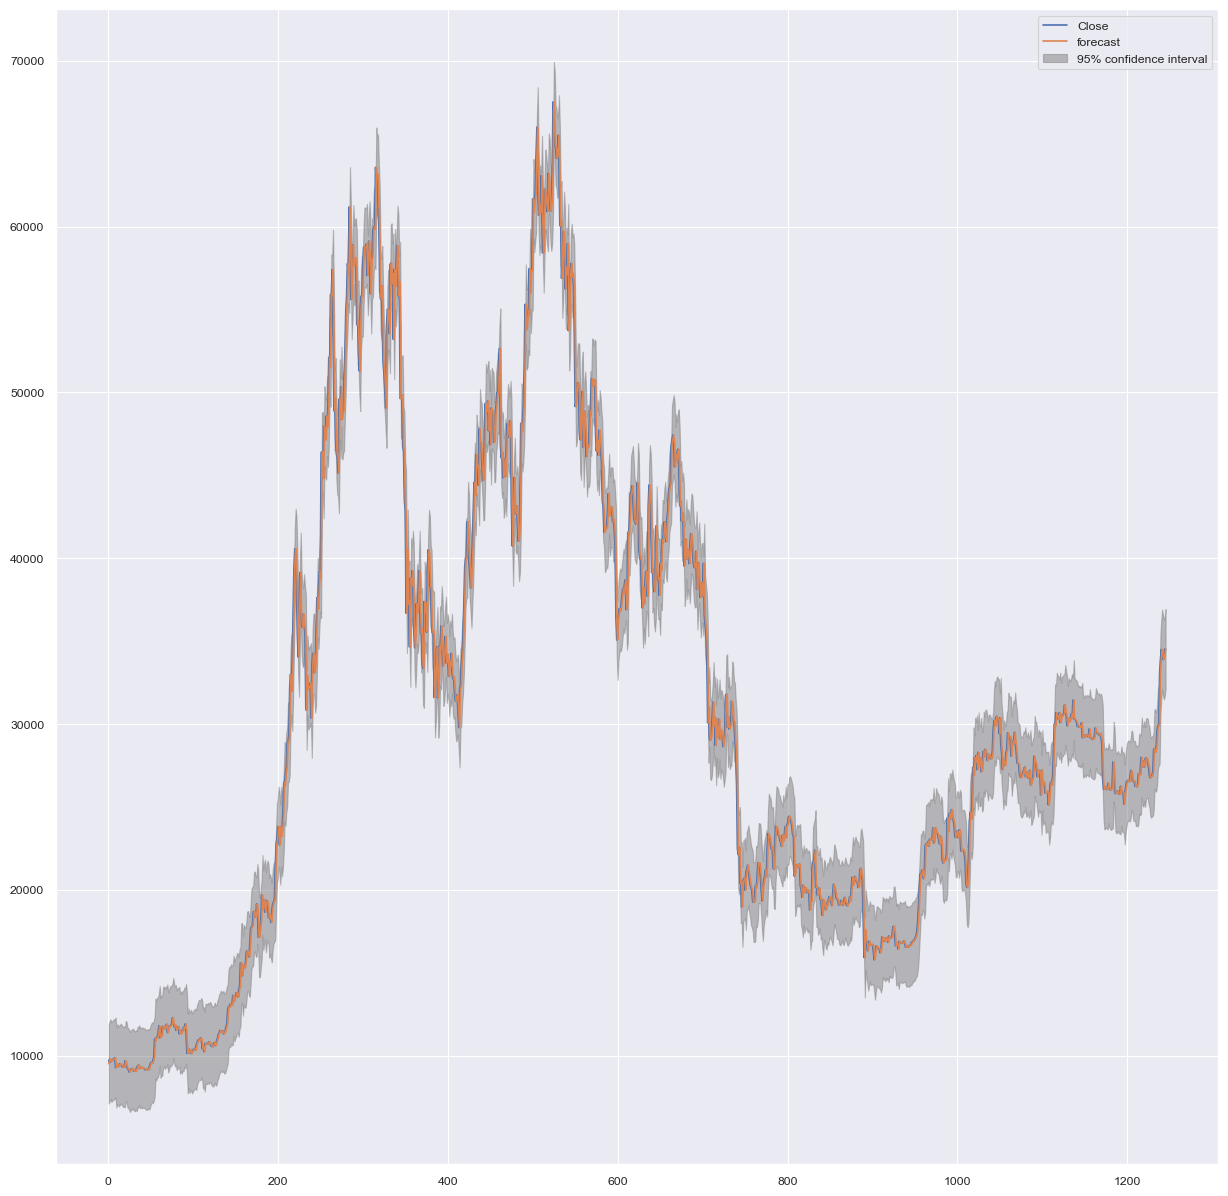

Horizonte: 14 días
train: (1239,)
test_: (14,)
Mejor modelo ARIMA considerando el Criterio de Inferencia Bayesiana (BIC):
bic: 21138.38288 | order: (0, 1, 0)


<Figure size 1200x800 with 0 Axes>

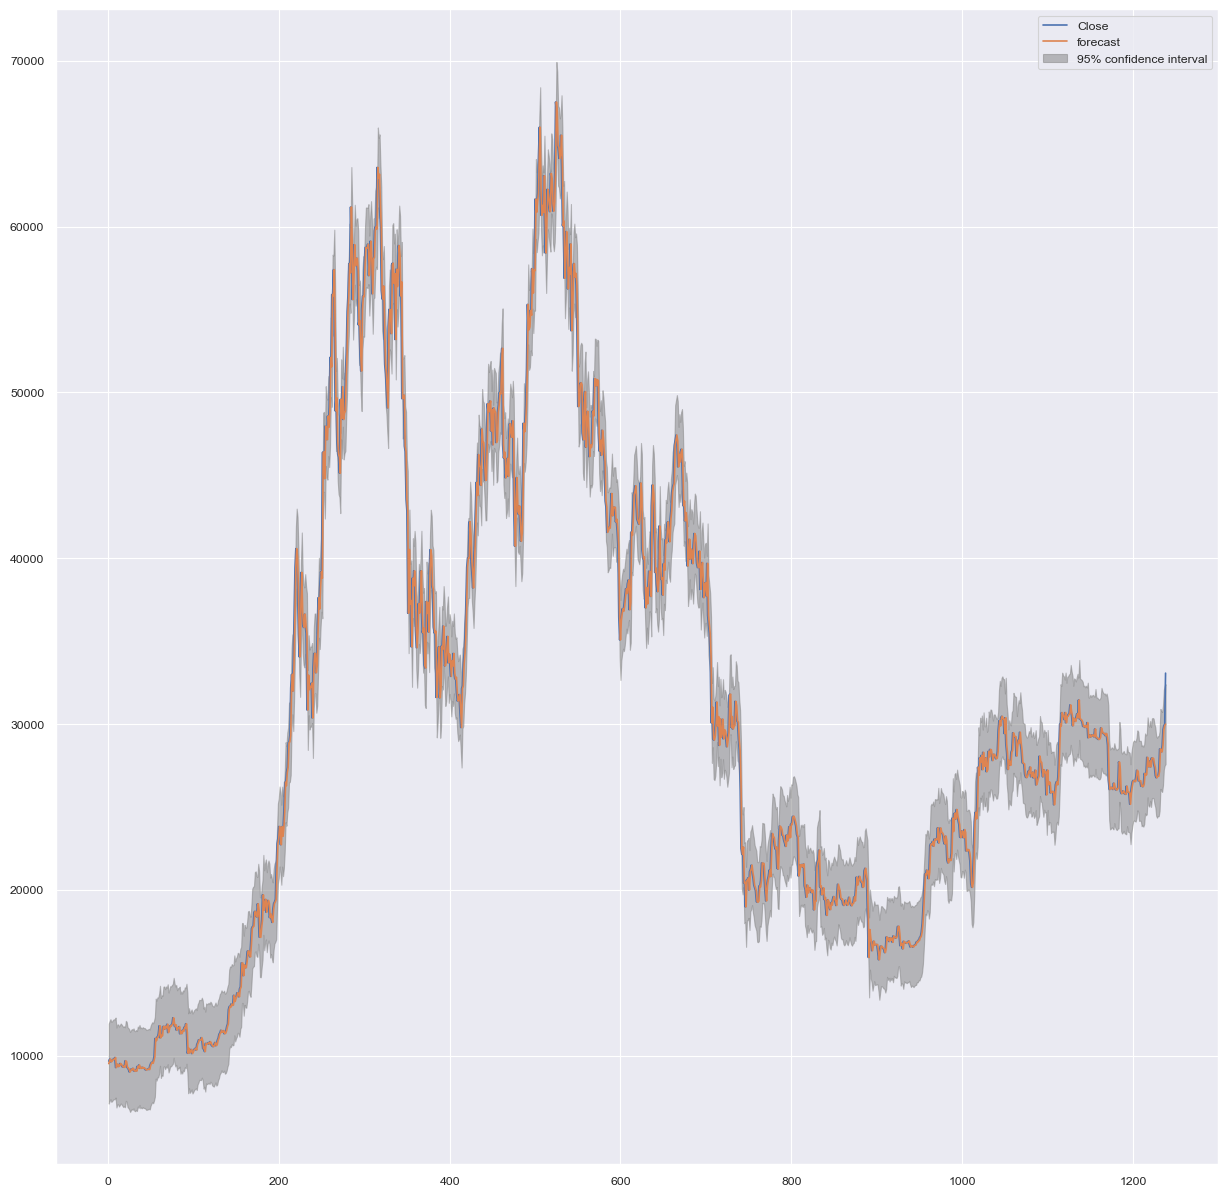

Horizonte: 21 días
train: (1232,)
test_: (21,)
Mejor modelo ARIMA considerando el Criterio de Inferencia Bayesiana (BIC):
bic: 21018.88541 | order: (0, 1, 0)


<Figure size 1200x800 with 0 Axes>

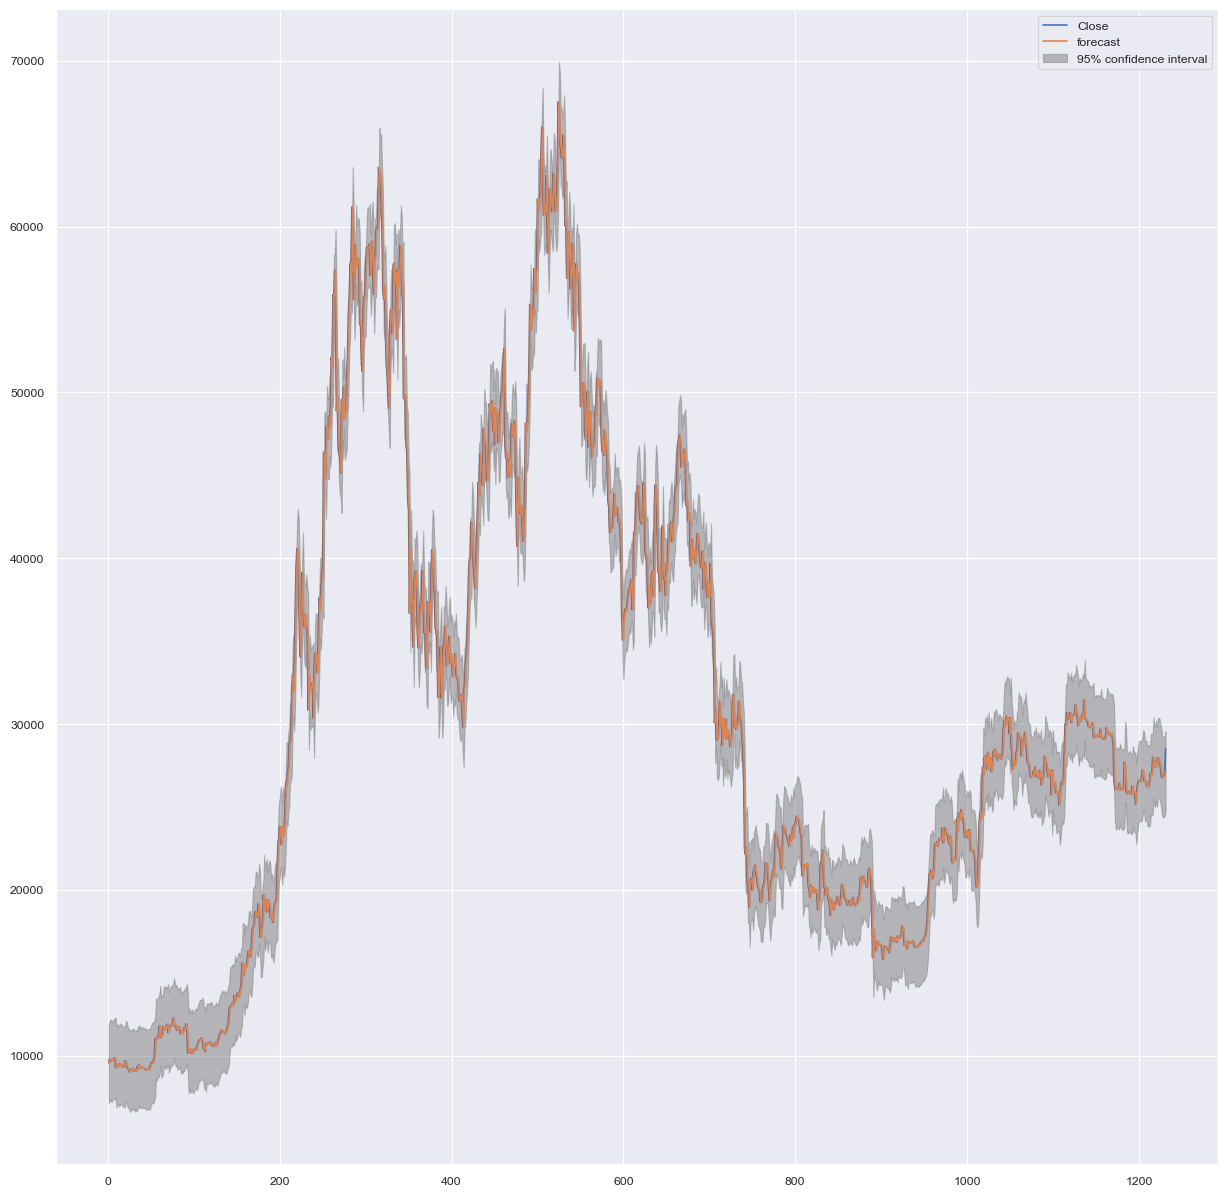

Horizonte: 28 días
train: (1225,)
test_: (28,)
Mejor modelo ARIMA considerando el Criterio de Inferencia Bayesiana (BIC):
bic: 20904.91125 | order: (0, 1, 0)


<Figure size 1200x800 with 0 Axes>

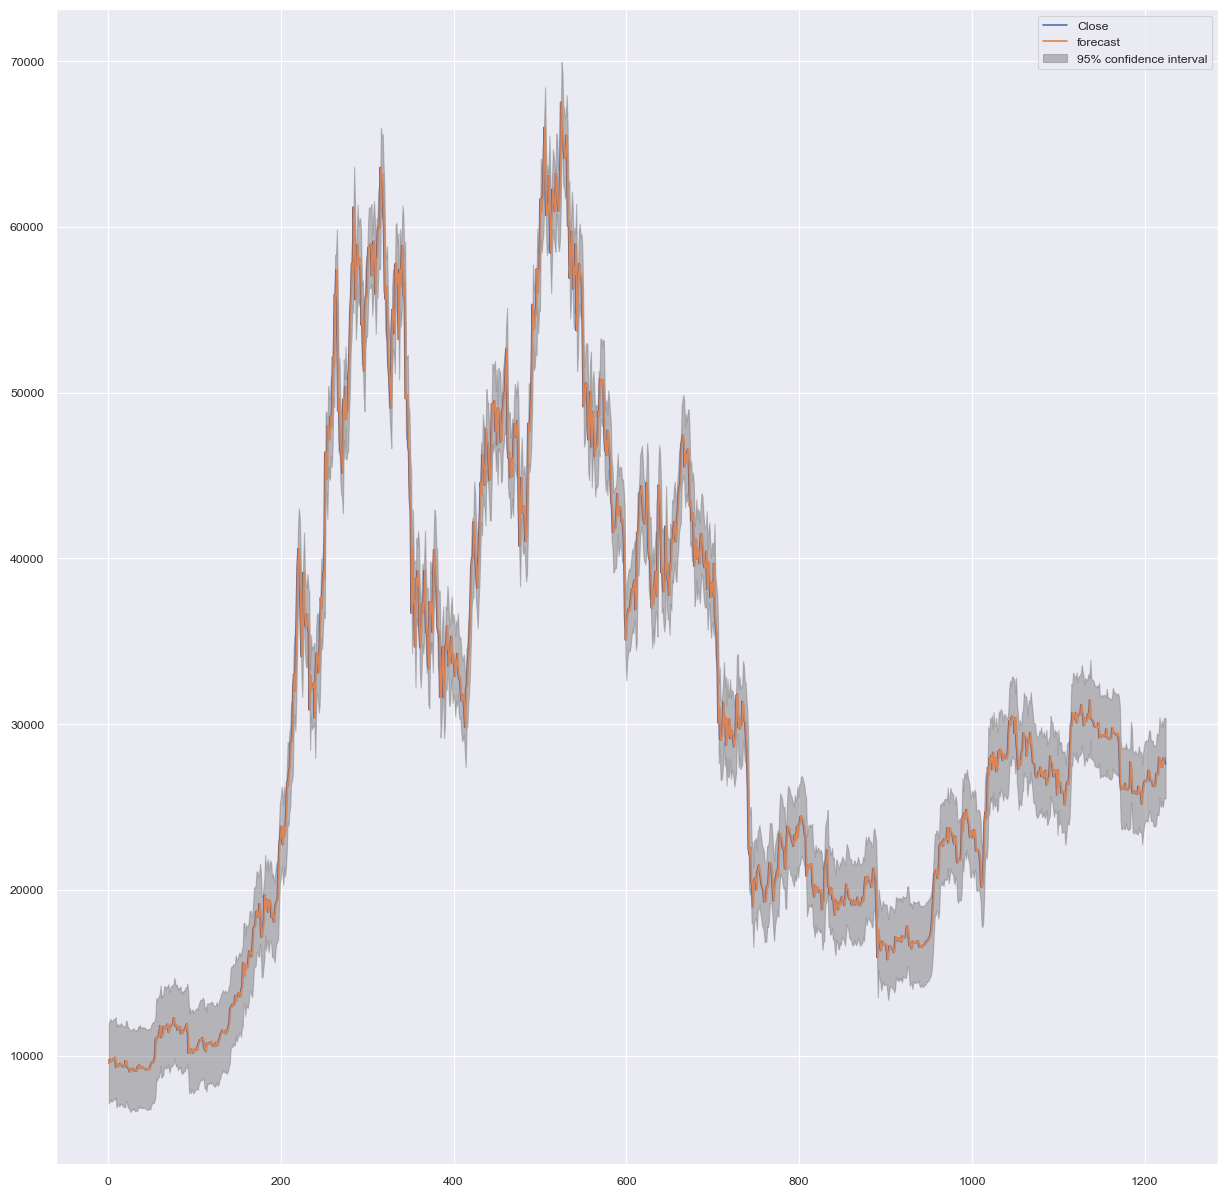

In [26]:
n_BTC = len(BTC_df) #Número total de cierres
n_test_req = [7,14,21,28] # Tamaño de conjunto de prueba

for n_test in n_test_req:
    train_size = n_BTC - n_test # define el set de entrenamiento como el numero total de cierres menos el test.
    train = BTC_df.Close.iloc[:train_size] # extrae los cierres del set de entrenamiento
    dates_train = BTC_df.Date.iloc[:train_size] # extrae las fechas del set de entrenamiento
    test_x = BTC_df.Close.iloc[train_size:train_size + n_test] # extrae los cierres del set de prueba (entrenamiento + prueba)
    dates_x = BTC_df.Date.iloc[train_size:train_size + n_test] # extrae las fechas del set de prueba (entrenamiento + prueba)
    
    print("Horizonte:",n_test,'días')
    print("train:", train.shape)
    print("test_:", test_x.shape)
    print("Mejor modelo ARIMA considerando el Criterio de Inferencia Bayesiana (BIC):")
    best_bic, best_order, best_mdl = find_best_arima_BIC(train)
    
    print('bic: {:6.5f} | order: {}'.format(best_bic, best_order))
    
    model = ARIMA(train, order=best_order)
    model_fit = model.fit()
    plt.figure(figsize = (12,8))
    fig, ax = plt.subplots()
    ax = train.loc[1:].plot(ax=ax)
    plot_predict(model_fit, 1, ax=ax)
    plt.show();
    
    
    

El resultado anterior obedece a la generacion de modelos ARIMA considerando el criterio de Akaike para cada horizonte (7, 14, 21,28) solicitado.

En este modelo el criterio de información Akaike (AIC) es de orde (p,d,q) presenta las siguientes características:

- 'p' autorregresivo (AR) significa que el modelo predice con los 'p' valores anteriores.

- 'd' grado de diferenciación (I) significa que utilizara una diferenciación de 'd' orden para hacer la serie estacionaria.

- 'q' numero de términos promedio móvil (MA) significa que el modelo utiliza 'q' errores de predicción pasado para modelar la serie temporal.

Considerando el Criterio de Inferencia Bayesiana, en ninguno de los 4 horizontes (7,14,21,28) se considera una relacion autoregresiva, por lo tanto el modelo bajo el criterio BIC no considera que los valores historicos de la criptomoneda Bitcoin tengan un efecto directo en los valores futuros.

### Rolling forecastig

A continuacion se realizaran las prediciones utilizando rolling forecasting basado en el mejor modelo mejor modelo ARIMA bajo el Criterio BIC.

Horizonte: 7 días
predicted=34474.730000, expected=34639.770000
predicted=34639.770000, expected=35421.430000
predicted=35421.430000, expected=34941.590000
predicted=34941.590000, expected=34716.780000
predicted=34716.780000, expected=35062.070000
predicted=35062.070000, expected=35011.880000
predicted=35011.880000, expected=35018.670000
   Horizonte         MAE            MSE      MAPE        RMSE      R2
0        7.0  293.374286  148686.691886  0.008415  385.599134 -1.6667
Horizonte: 14 días
predicted=33069.990000, expected=33922.730000
predicted=33922.730000, expected=34496.050000
predicted=34496.050000, expected=34151.660000
predicted=34151.660000, expected=33892.020000
predicted=33892.020000, expected=34081.000000
predicted=34081.000000, expected=34525.890000
predicted=34525.890000, expected=34474.730000
predicted=34474.730000, expected=34639.770000
predicted=34639.770000, expected=35421.430000
predicted=35421.430000, expected=34941.590000
predicted=34941.590000, expected=34716.78

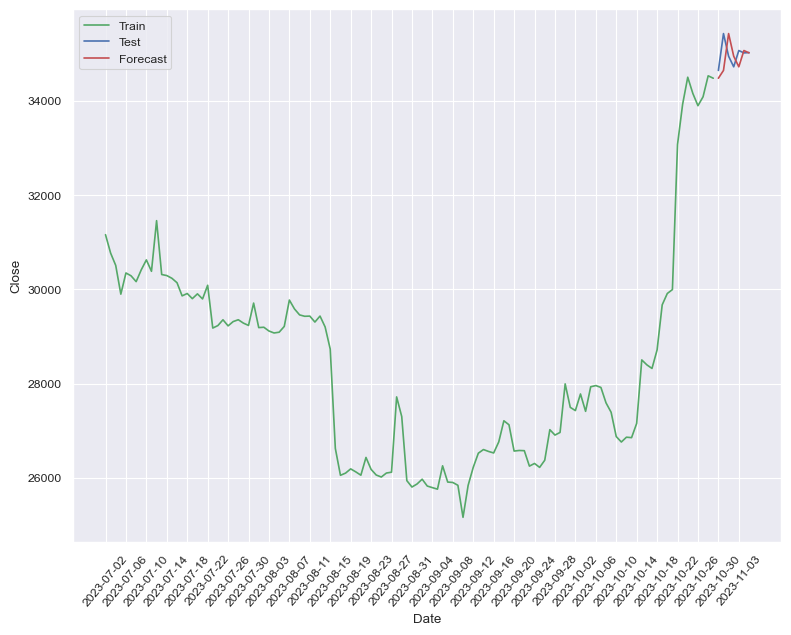

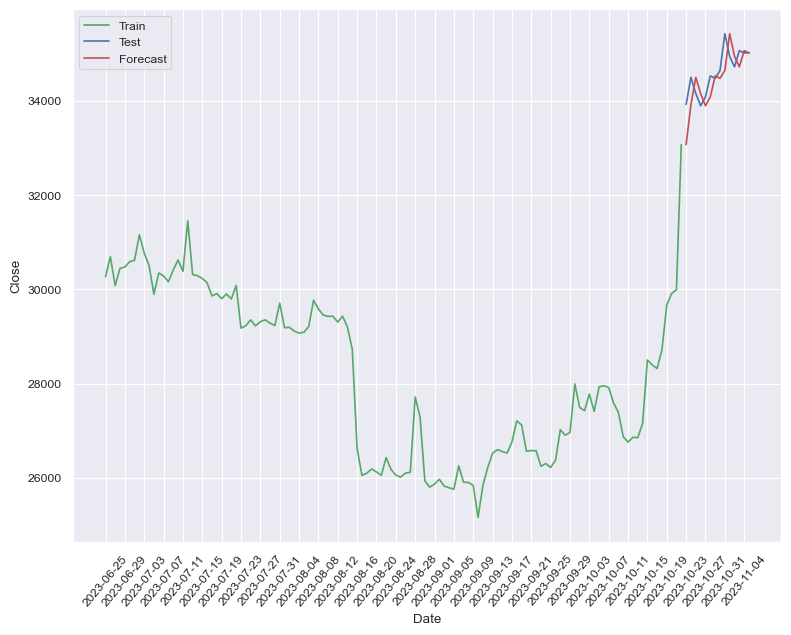

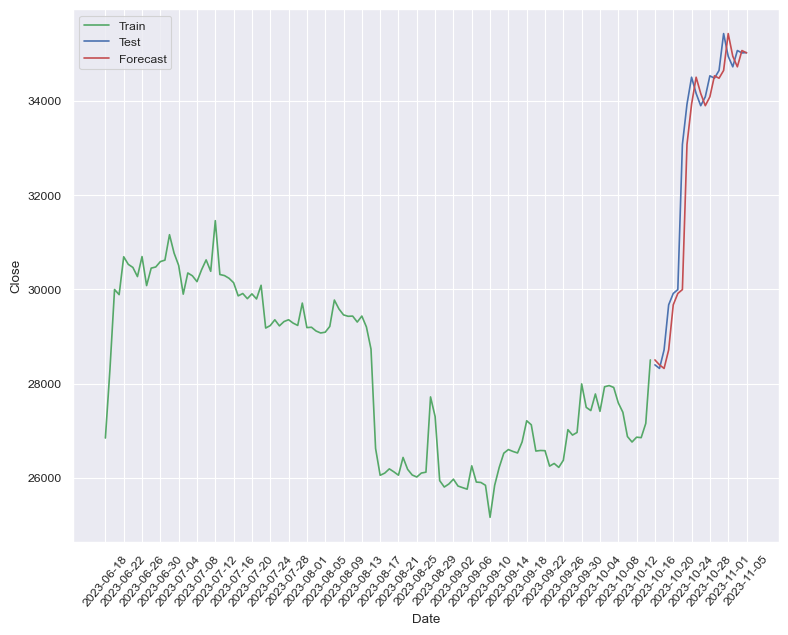

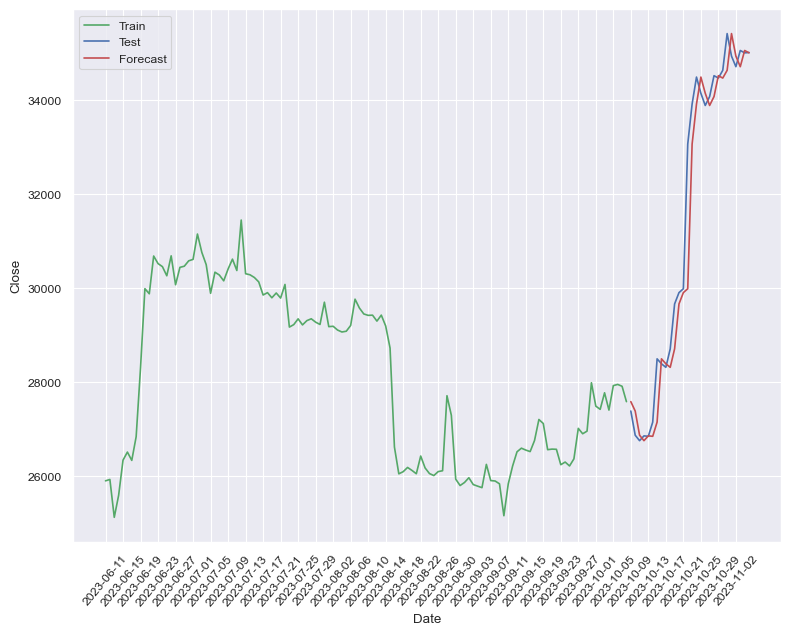

In [27]:
n_BTC = len(BTC_df) #Número total de cierres
n_test_req = [7,14,21,28] # Tamaño de conjunto de prueba

results_errors_BIC = pd.DataFrame(columns=['Horizonte', 'MAE', 'MSE', 'MAPE', 'RMSE', 'R2'])
count = 0

for n_test in n_test_req:
    train_size = n_BTC - n_test # define el set de entrenamiento como el numero total de cierres menos el test.
    train = BTC_df.Close.iloc[:train_size] # extrae los cierres del set de entrenamiento
    dates_train = BTC_df.Date.iloc[:train_size] # extrae las fechas del set de entrenamiento
    test_x = BTC_df.Close.iloc[train_size:train_size + n_test] # extrae los cierres del set de prueba (entrenamiento + prueba)
    dates_x = BTC_df.Date.iloc[train_size:train_size + n_test] # extrae las fechas del set de prueba (entrenamiento + prueba)
    
    print("Horizonte:",n_test,'días')
    
    yhat_x  = arima_rolling(train.tolist(), test_x.tolist())
    df_acc= forecast_accuracy(np.array(test_x), np.array(yhat_x), n_test)
    results_errors_BIC.loc[count] = [n_test, df_acc.iloc[0]['MAE'], df_acc.iloc[0]['MSE'], df_acc.iloc[0]['MAPE'], df_acc.iloc[0]['RMSE'], df_acc.iloc[0]['R2']]
    count = count + 1
    print(results_errors_BIC)
        
    plt.figure(figsize = (8, 6))
    ax = sns.lineplot(x=dates_train[-120:], y=train[-120:], label="Train", color='g')
    sns.lineplot(x=dates_x, y=test_x, label="Test", color='b')
    sns.lineplot(x=dates_x, y=yhat_x, label="Forecast", color='r')
    freq = int(4)
    xtix = ax.get_xticks()
    ax.set_xticks(xtix[::freq])
    plt.tight_layout()
    plt.xticks(rotation=50)
    

In [28]:
results_errors_AIC

,Horizonte,MAE,MSE,MAPE,RMSE,R2
0,7.0,308.326122,166243.249511,0.008835,407.729383,-1.981578
1,14.0,347.667141,188816.587090,0.010143,434.530306,0.065014
2,21.0,460.718201,622640.817797,0.014509,789.075927,0.899171
3,28.0,441.581416,547609.222430,0.014415,740.006231,0.950046


In [29]:
results_errors_BIC

,Horizonte,MAE,MSE,MAPE,RMSE,R2
0,7.0,293.374286,148686.691886,0.008415,385.599134,-1.666700
1,14.0,340.624286,179924.533786,0.009949,424.175122,0.109046
2,21.0,461.881429,625683.592624,0.014586,791.001639,0.898678
3,28.0,438.935357,549020.946082,0.014345,740.959477,0.949917


En general los resultados no distan significativamente, no obstante, el modelo ARIMA bajo el criterio BIC presenta mejores resultados que el modelo ARIMA bajo el criterio AIC. Por diseño el modelo BIC es más dependiente del tamaño de la muestra que el AIC.
El modelo AIC está diseñado para seleccionar un modelo que minimice la distancia de información entre el modelo verdadero y el modelo aproximado. No tiene en cuenta el tamaño de la muestra de manera explícita, lo que significa que puede favorecer modelos más complejos con más parámetros.

El modelo BIC también busca seleccionar el mejor modelo, pero introduce una penalización más fuerte para modelos con más parámetros y es más dependiente del tamaño de la muestra que el AIC. 
